# Downloading data with `yfinance`

Instead of local CSVs you can pull data straight from Yahoo Finance. The `CachingProvider` wraps it so you don't re-download every time.

In [1]:
import sandtable as st

## Direct download

In [2]:
yf_provider = st.YFinanceProvider()

df = yf_provider.fetch("AAPL", "2022-01-01", "2023-12-31")
print(df.shape)
df.tail()

(501, 5)


Price,open,high,low,close,volume
date,,,,,
2023-12-22,193.173208,193.400854,190.985939,191.609467,37149600
2023-12-26,191.619349,191.896469,190.847370,191.065109,28919300
2023-12-27,190.510906,191.510516,189.125291,191.164108,48087700
2023-12-28,192.143900,192.658558,191.183873,191.589661,34049900
2023-12-29,191.906370,192.401229,189.758683,190.550461,42672100


## With caching

Wrap the provider with `CachingProvider` to save downloaded data to disk. Next time it'll just read from the cache.

In [3]:
cached = st.CachingProvider(
    provider=st.YFinanceProvider(),
    cache_dir="../data/cache",
    cache_format="parquet",
)

# first call downloads, second call reads from cache
df = cached.fetch("MSFT", "2022-01-01", "2023-12-31")
df.head()

Price,open,high,low,close,volume
date,,,,,
2022-01-03,323.740000,326.298250,318.362830,323.160767,28865100
2022-01-04,323.237993,323.595208,314.829546,317.619507,32674300
2022-01-05,314.578536,314.781287,305.040612,305.426758,40054300
2022-01-06,302.308568,307.666442,300.706035,303.013306,39646100
2022-01-07,303.273963,305.542611,299.354525,303.167786,32720000


## Using it in a backtest

In [4]:
data = st.DataHandler(
    provider=cached,
    universe=["AAPL", "MSFT"]
)
data.load("2022-01-01", "2023-12-31")

strategy = st.MeanReversionStrategy(lookback=20, threshold=2.0)

result = st.run_backtest(
    strategy=strategy,
    data=data,
    initial_capital=50_000,
)

m = result.metrics
print(f"Return: {m.total_return:.2%}")
print(f"Sharpe: {m.sharpe_ratio:.3f}")
print(f"Trades: {m.num_trades}")

[2026-02-22 18:25:46] INFO:sandtable.api: Running backtest: MeanReversionStrategy on ['AAPL', 'MSFT']
[2026-02-22 18:25:46] INFO:sandtable.core.backtest: Starting backtest: AAPL,MSFT with 1002 bars
[2026-02-22 18:25:46] INFO:sandtable.core.backtest: Backtest complete: processed 1002 bars
[2026-02-22 18:25:46] INFO:sandtable.api: Backtest finished: return=0.95%, sharpe=0.39


Return: 0.95%
Sharpe: 0.386
Trades: 26


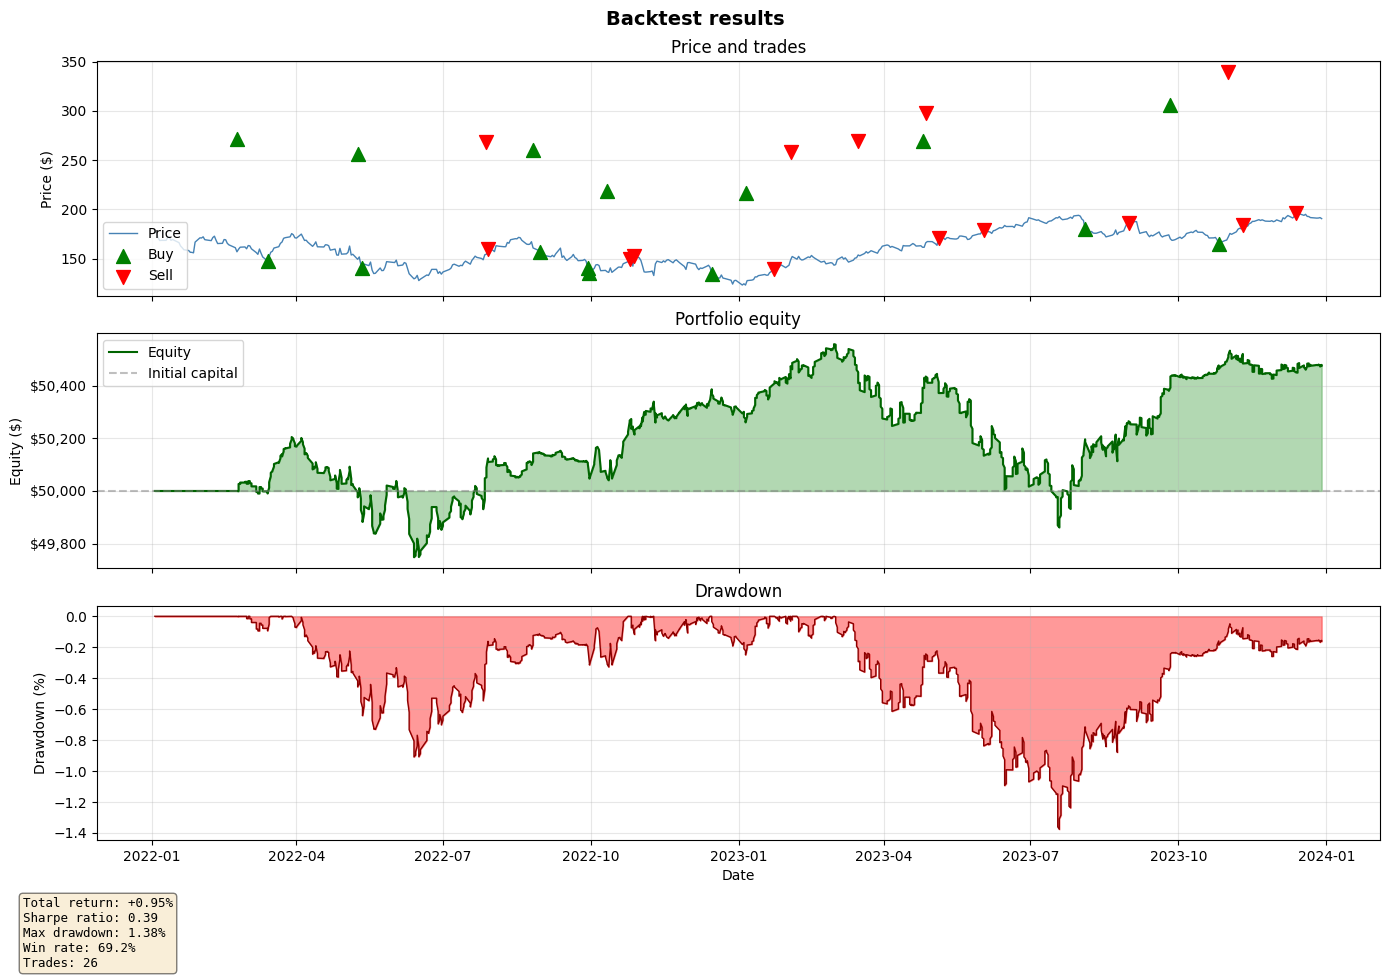

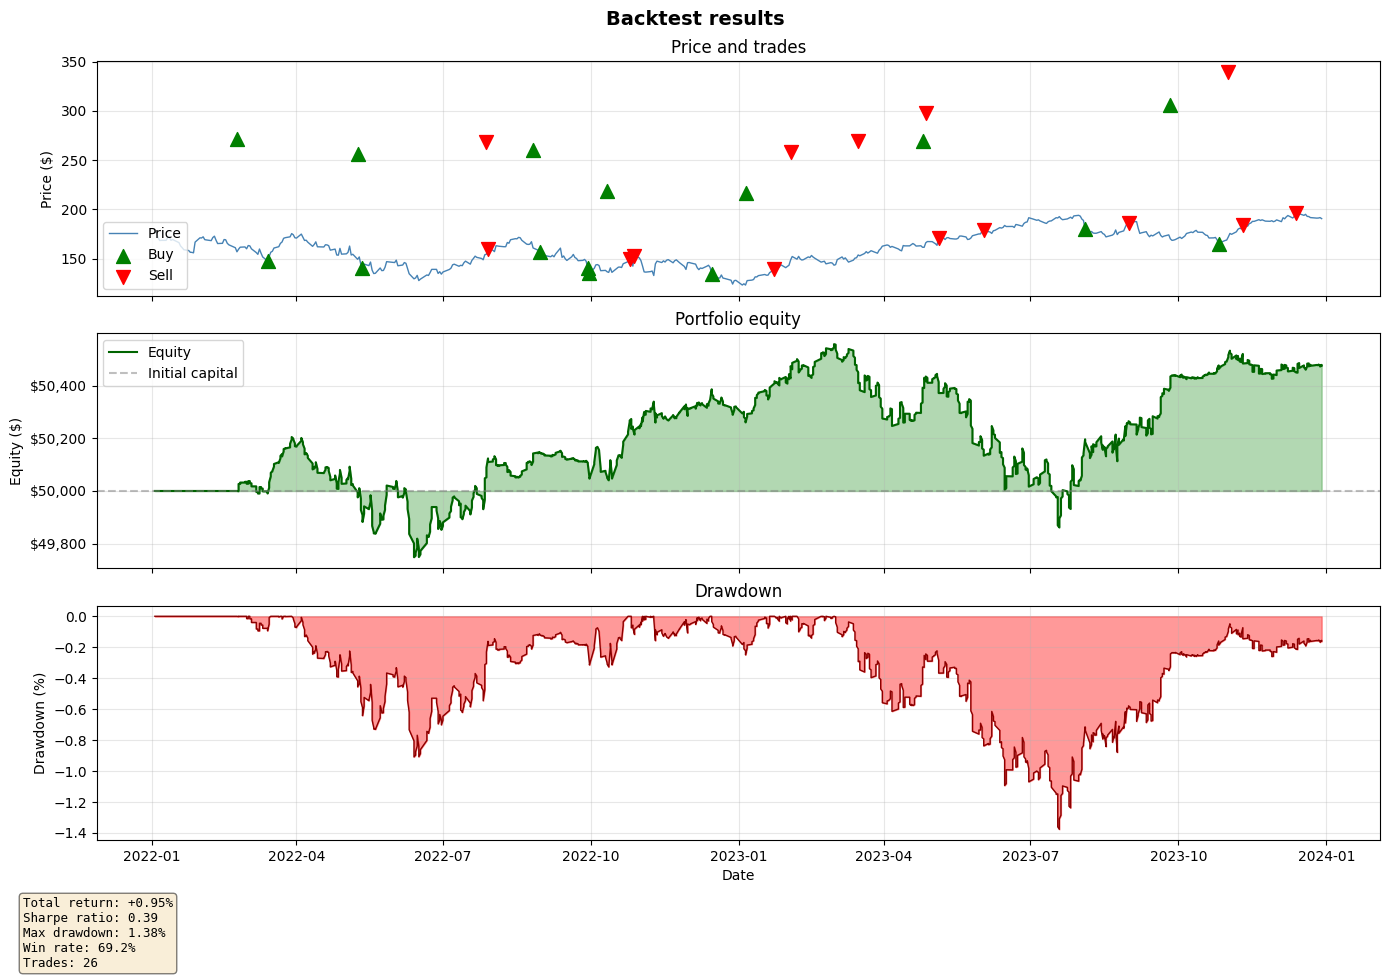

In [5]:
result.plot()